In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_pd = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_pd = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mc_data = pd.merge(clinical_trial_data_pd, mouse_drug_data_pd,  how='left', on=['Mouse ID'])

# Display the data table for preview
mc_data.head(15)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data = mc_data.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
tumor_data = pd.DataFrame(tumor_data["Tumor Volume (mm3)"])
# Preview DataFrame
tumor_data

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_data = mc_data.groupby(['Drug','Timepoint']).sem()
# Convert to DataFrame

df_std_err = pd.DataFrame(std_err_data['Tumor Volume (mm3)'])
# Preview DataFrame
df_std_err.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_data = tumor_data.reset_index()
tumor_pivot_data = tumor_data.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

df_std_err = df_std_err.reset_index()
std_err_pivot_data = df_std_err.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
std_err_pivot_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


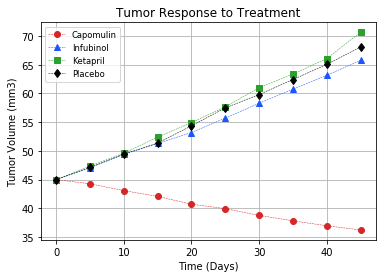

In [5]:
# Generate the Plot (with Error Bars)

#TODO: Create a loop that will go throw object of data instead of 4 ugly lines
plt.errorbar(std_err_pivot_data.index,tumor_pivot_data["Capomulin"], c='#d62728', marker='o', ls='dashed', linewidth=.5)
plt.errorbar(std_err_pivot_data.index,tumor_pivot_data["Infubinol"], c='#1a55FF', marker='^', ls='dashed', linewidth=.5)
plt.errorbar(std_err_pivot_data.index,tumor_pivot_data["Ketapril"], c='#2ca02c', marker='s', ls='dashed', linewidth=.5)
plt.errorbar(std_err_pivot_data.index,tumor_pivot_data["Placebo"], c='#000000', marker='d', ls='dashed', linewidth=.5)

plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig('diagrams/tumor_respond_treatment.png')

In [6]:
# Show the Figuredata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAEWCAYAAABrDZDcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvIxREBQAAIABJREFUeJzs3Xd4FNX6wPHvm5CwJoQWSOhFOgERCKDU0JQroFIDikiXH1cR7PWKerFdpNhFRLkWihQpItiIoHKBgLQQAwIJBEIC6W2T3ez5/TGbkEDKJmQh5XyeZ59kZ86cefcQ9sycmXmPKKXQNE3TKi+XGx2ApmmadmPpjkDTNK2S0x2BpmlaJac7Ak3TtEpOdwSapmmVnO4INE3TKjndEWiaplVyuiOoYEQkJdfLJiLpud7ff6Pjy01EqoiIEpFUe3yRIvIfEanwf5f2zxpQgu1uvuLfOHf7pYjI7U6I9X8iMqG063Vw30NE5O8bse/KpMqNDkArXUqpatm/i0g4ME0p9dONiygnlipKKWsBq/2UUuEi0hrYCRwDPrt+0ZUfSqlTQDUw2hSwYG+/grYREVelVNb1iVArjyr8kZeWl4h8KSLzcr0fZO8wst9HisgTInLUfoS5VER8RWS7iCSJyA8iUjNX+XtFJEREEkTkFxFpc0VdT4rIESCtqNiUUseBP4Bbc9VRU0Q+E5Eoe32vZJ8xiEhrEdkpIokicklEvrYvzz7TeERETtvXvZFrOxcR+ZeIRIhIjIh8LiLV7eta2redaN/fRRF5Jlc8t4nIAXtbRIvIf3Kt62U/ek4QkYMi0reAf4OVQAPge3sbP1ZUWxaHiKwSkXfs/1apwO0icpOILBaRsyJyQUTeFZGq9vJ1ReR7+2eNE5GNIlLfvu5toBuwzB7r2yJisrfRTBE5aW+LF0SkjYjstf97fGXvqLJjGiEih+2fbZeItM+17oKIzLX/zWVv6y4i3sAGIPdZkHdJ2kQrglJKvyroCwgHBl2x7EtgXq73g4DwXO8jMb6MfYBGQCwQDHQCTMCvwPP2su2AFGAA4AY8BxwH3HLVtd9ez035xFcFUECzXPVFA4/kKrMF+ADwAOrZ65tqX/cN8DTGAY0J6HVFvT8BtYBmwN/AJPv6GfY4mwNewEbgM/u6lvZtP7LX2QXIAFrZ1+8Dxtt/9wJ62H9vbG+rO+3xDAEuAd4F/NtEAgG53hfalgXUkaf9ci1fBcQBPeyxVLV/nrVATaAGsB14yV7eF7gHuMm+biOwKld9/wMm5Hpvsu/3G4yzk84YZyY/AE2B2sAJINBe/jYgCugKuOZq/yr29ReA3+1x1L3i32oI8PeN/r9U0V/6jEDLzxKlVIxSKhL4DditlDqklDID32L8xwcYB2xSSv2ilLIAbwDVMb6ActcVqZRKL2R/h+1HrseAH4GPAUSkITAQmKuUSlNKXQAW2/cLxpdPM6C+UsqslPr9inrfUErFK2PY5B1gvH35/cACpdRppVQyxpfufZL32sQ8e50HgBCMjjB7n61ExFsplayU2mNfPtHeFtuVUjal1DbgEMYXmSMcacviWKuU2qOUsgFZwBTgUaVUglIq0V7/OAClVLRSaqNSKt2+7nWgnwP7eEMplaKU+hPji/07pVSEUioOo1PI/jt5CHhPKbVfKZWllFqK0Tl1zVXXInscF4Gt5Dor1JxPdwRafqJz/Z6ez/vs6xANgIjsFfYvnUigYa7yZx3Y3y0YR9f3AbdjHP2DcXRZFYi2DykkAO9jHDkCPI5x9BwsIkdE5MEr6s297wh7vFfFbf/dHeNoNPuzXMi1Po3Ln3ky0B4Isw+D3JUr1vHZcdpjvS3XPoviSFsWR+7P3gCjnUJyxfYtxlkfIuIlIstF5IyIJGF8iddxYB+O/p00BZ67om3qkvezFdTe2nWgLxZXPqlc/qIFY7ilpM4DrbLf2I+oGwHncpVxKL2t/YtvpYjcC7wAPIHxZZYG1Lavv3KbKGCafd99gR9FZCeXvwQbA2H235vY482Ou2muqpoAmcBFjA6psDjDgHH2zzoGWCcitez7/Ewp9X+OfF6ubhdH2rI4ctcfBViBFkqp2HzKPmPfVzelVLSI3IZxJlhQrMV1FuNs4e0SbKvTI18H+oyg8jkIDBWRWvYLgrOvoa41wN0iEiAibsCTQDKwp/DNCvU6MFNE6iqlzmJck1ggItXtF3lbZl+EFZGx9uEjgASML43cd8c8JcbF5iYYn3O1fflK4DERaSYiXsB8YGV+nc2VROQBEaljL5to36cN+AIYISKDRcTVfkG1v4gUdEYQDdyc670z2hIA+1DTcmCJiNQRQ2MRGWwv4oXR4SaISB2MjriwWItrKfCIiPjb911NRO4WEY8itzT27SMi+gzBiXRHUPl8DoRiDENsw7iwWCJKqRDgQeBDjKPpIcDd9i+ektZ5ENiNcUYAMAHwxLh+EI9xgTL7LKYHsM9+fWE98E+l1Jlc1W3G6Pj+xLj75HP78k8wOoVdwCmML9xHHQzxLiBURJKBBRgXRDPt1yFGAC9itMUZjKGrgv6PvQa8bB8qmeOMtrzCHIyzjmCMDmwbxoVx7J+jDsbF7t8wxuhzWwRMFJF4EXmruDu2X7uZjXHtJwHjesJ9OHa0fwjYBETY26p2cfevFU2U0mdeWsUil++vb64Kub9e0zSDPiPQNE2r5HRHoGmaVsnpoSFN07RKTp8RaJqmVXLl4jmCOnXqqGbNmpVo29TUVDw9PUs3oHJMt8dlui3y0u2RV0Voj/37919SStUtqly56AiaNWtGcHBwibYNCgoiICCgdAMqx3R7XKbbIi/dHnlVhPYQkYiiS+mhIU3TtEpPdwSapmmVnO4INE3TKrlycY3gSgkJCVy6dAmLpein72vUqEFoaOh1iKrscXNzo06dOtSsWbPowpqmVVrlsiOIioqiWbNmmEwmRKTQssnJyXh5FZpQskJSSmE2mwkPD9cdgaZphSqXHQHATTfddKNDKNNERLeRppVTAasDiDVfnTHc2+RNUGBQqe9PXyPQNE0rY/LrBApbfq0qdEeQuHkzUcPvJrRde04MGEji5s0lqmfXrl0EBATQt29fBg4cyNGjR0s50qJ9/vnnvPfeewA89NBD133/mqZVXOV2aKgoiZs3E/Xiv1BmMwDW8+eJevFfANQYPtzhemJjY5k1axY//vgj9erVIzY2lvPnzxe9oRN9/PHHN3T/mqZVLE47IxCRNiJyMNcrSUTmiEhtEflRRE7Yf9Zyxv5jFi3O6QSyKbOZmEWLi1XPd999x8iRI6lXz5gLxdvbG4ABAwbQs2dPHn74YcB4CnHo0KEMHTqU7t27c+LECQAWLFjA7bffTs+ePdm/fz8AXbp0YebMmdx6660sXbqUSZMm0blzZ1auXAlAQEAAKSkpAIwbN47w8PA8Mfn7+wMwadIkpk+fzqBBg7jnnnvQCQQ1TSsJp50R2Od2vRVARFwx5l7dgDE/6s9KqTdE5Bn7+6dLup/UPXtJ27sXrzvuIG3vXrISEqg5dizWAo7arefPkxl5jsQNGzD5+QHg4umJZ4/u+ZaPioqiQYO8sw22bNmSn3/+GRFh5MiROV/6iYmJ7Nq1i927dzN//nzeeOMNNm3axO+//054eDgzZszgp59+IiEhgeeffx5vb2/q16/PiRMncHd3Z+jQoYwfP75Yn79Pnz588skn3H///Rw5coRbbrmlWNtrmlZ2JGYkEnIp5Lrv93oNDQ0ETiqlIkTkHiDAvnwFEMQ1dASePbrnfImb2rTOWV6lQYN8O4MqDRrg3qghdR952KH6GzRokPNFny08PJzHHnuMtLQ0Tp8+nTNU1LlzZ0SErl27cvLkScLDw+nUqRMuLi7cfPPNJCYmAlCrVi0aN24MQNu2bfHx8QEgIyMDIM8tsUUd5Xfu3BmAxo0bEx8f79Bn0jSt7LEpGytCVvCg34N4m7wLvGvIGa5XRzAOY8JwAF+lVBSAUipKRHzy20BEZgAzAHx9fQkKCspZV6NGDZKTkwvdodfMmSS89lqe4SExmfCaObPIbXPr27cvb7zxBhMnTsTX15e4uDgeeughZs+ezZ133sn9999PamoqAPv37ycpKYl9+/bRpEkT6tSpw/79+0lMTCQiIgIvLy+Sk5NRSuXEYLPZrvrdy8uLv/76ixYtWnDw4EFSUlIwm82YzWaSk5NzylksFtLS0khOTiYzM5PU1NSrPpvZbM7TdikpKXneV2a6LfLS7ZHX9WyPvSl78XL14pabbuHP3X8yz3degWWdEZPTOwIRcQfuBp4tznZKqaXAUgB/f3+VOwtgaGhokQ+JeY0dw003mYh+eyFZ0dFUqV8fn7lzinWhGMDLy4uPPvqIqVOnAuDu7s7o0aN56aWXWLlyJSKCh4cHADVr1mTcuHFcunSJr776ipYtWzJy5EiGDBmCiPDuu+/i5eWFi4tLTvyurq45v2cvnz17NpMnT6Z169b4+PhQrVo1TCYTVqs1z/Zubm54enri5eWFu7s7Hh4eV7WLyWTKOWuAipFRsbTotshLt0de16M9MrMyiU6N5qbUm+hRv4dT91UopZRTX8A9wA+53ocB9e2/1wfCiqqja9euKrdjx44pRyUlJTlc9lrs2LFDPf7449dlX8VxZVvt2LHjxgRSBum2yEu3R17Obo8Ec4J6dfer6lzyOaftAwhWDnxPX4/nCMZzeVgIYBPwoP33B4GN1yEGTdO0MmP3+d3EpMXwZLcnaVCtQdEbOJlTh4ZExAMYDOR+AuoNYI2ITAXOAGOcGcP1EhAQoE+rNU0rlE3ZOJdyjui0aG5vcPuNDieHU88IlFJpSilvpVRirmWxSqmBSqlW9p9xzoxB0zStLEjOTOY/+/6Du4s797a890aHk0eFfbJY0zStrPg7/m9s2HjoloeoaSp72YArdK4hTdO0G21/9H52nttJixotit0JhISE0KFDB0JCnPuQWYXvCGIShFEvQUxCyesIDw9n9OjR+a5LS0ujT58+DB48uMDts1NC5DZnzhzS09OLFUd+9WiaVjZZsix8cvgTOtbpyJQOU3B1cS3W9qmpqdx1110cO3aMoUOH5jyv5AwVviP4YLM7e/6CxWudU/+hQ4fo0qULP/74Y7G2W7x4sZ4vQNMqqDRLGnsv7GVI8yG4u7qXqI4pU6YQExODUoro6OicZ5mcoUJ3BNHxsOF3N5SC1UHXdlYAxp1Bc+bMoW/fvsyaNQuARx99lPXr1/PII4/kSRW9bds25s2bBxhnDQ888ACdO3fm22+/zakrJSWFzz//nJEjRzJ06FC6deuWk64iv2R1mqaVfcEXgll6eCk9G/SksVfjEtWxfPlyvvvuO8z2zAhms5nNmzezfPny0gw1R7nvCP4IgbfXQOgZWP698fuFOOPn3PfBajPKZWXBtAXwzno4G2Os/yHYeP1RjOG3kSNHsnPnTg4fPkxiYiJvvfUWgYGBvPvuuwVuc+bMGZYsWcLOnTt59dVXr1pfs2ZNvvvuO2bMmMHatWu5cOFCTrK6L7/8kqefLnEqJk3TrhOlFDvO7KCRVyMe7fJokdPoFubpp5++aigoLS2NZ58tVoIGh5X7u4Z6+hkvgHZNLi+fMBje3whZWcY/hiULQsJh2RPgUxMeH1uy/WWna2jUqBEJCXlPMQpKFte8eXNq164NQNWqVbFarfnW2bhxY/bs2VNgsjpN08quNWFraOfdjnqe9Upch81m4/nnn2f06NF88cUXeToDDw8P3njjjdII9SrlviMoyOJ1cGXiTpvNuFbw2rSS11tYZtBatWpx7NgxgDzDOeHh4SQkJODm5kZGRgZVquRt9ivrbNasGQcPHsRms+nJ5zWtjDuVcIpd53bxoN+DRRcuQGRkJO+++y6BgYHMnz8fFxcX4uLi2LRpE2azGZPJxPDhw5k8eXIpRn5ZuR8aKsj+45CZ98CbTCsEH3fePgcNGsTu3bsZMmQIYWFhOcsbN27MrFmz6NOnDy+++GKR9dSrV4977rmHXr16MWHCBKcdBWiadm1i0mIITwpnQrsJJdo+PDycl156CZPJxMsvv0yXLl1wcTG+lpcvX46Pjw8igq+vL59++mlphp6XIwmJbvSrPCSdK6t00rmC6bbIS7dHXkW1x9JDS9WOM4WXKUhkZKTatGmT2rFjh0pJSSmw3NGjR5Wfn586evRoifaDg0nnKuzQkKZpmjNcSr/EkYtHGN92PNXcqxVr25iYGDIyMlizZg3Tp0+nevXqhZb38/Pj6NGj1xKuQyrs0JCmaVppy7Jlsfb4WnrU71GsTiA9PZ29e/eybNkyqlWrxuOPP15kJ3A96TMCTdO0IiilWBO2hgbVGjCz08xibfvJJ58QHR3N888/T/fu+c+NfqPpjkDTNK0QaZY0zqecx6+OHx3qdHBoG7PZzIcffkizZs148MEHcXcv2dPF14vuCDRN0+wCVgfknTR+hfGjVtVa7By3s8jtzWYzy5Yt4x//+AcjRoygWbNmzgm0lFXYawQBqwPouKIjPdf3pOOKjjmvgNUBxa4rd9K5sLAw/P39iYyMvKpcUFAQx49f2/2p27ZtY8OGDYBOMqdp11ueTiCX+Iz4QrfLzMzk22+/5eDBg9x55520aNGiVDqB6HiuOWmmIyrsGUFB/6AFLXdEZGQkEyZM4Ouvv6ZRo0ZXrQ8KCsLf35/WrVuXqH6bzcaQIUNKHJ+madeX1WrlwoULbNiwgQEDBuDn51eq9S9eR07SzGt5ELYoFfaMoLTFxcUxevRoPvroI1q3bk1wcDD9+/enT58+LFiwgPT0dD7//HOeffZZJk+eTHR0NIMGDaJv376MHj2arKwswsPD6dOnD6NGjaJz587s3r0bgC5duvDwww/z4IMP5klcp2na9ZOY4Xgql6ysLC5cuMAzzzxDQkICjzzySKl3AtHxsHoHpZY0szDlviPYd2EfHxz8gOPxx/kq9Cs+OPgBMWkxhW5zLuUcHxz8gKCzQQSdDWLfhX1F7ufAgQP4+PjQtWtXwEgKtX79enbt2sXvv/9OUlISkyZN4vXXX+ezzz6jVq1abNu2jZ07d9KkSRN++eUXwDirWLlyJRs3bsx5yjg+Pp45c+bwxRdfXGNraJpWHEopMrIyWLh/YZ7vAfM5MyeeP4H5nPmqbX799VeefPJJ3NzcWLBgAR06OHYBuXhxwVMfQ5Y9aWZ2ehxnKfdDQ93qdaNbvW4AtK7l2JBMw2oNmXXrrGLtZ9CgQdSvX5958+Yxb948jhw5wogRIwDji/zs2bN5ysfFxTFz5kzi4+OJioqiU6dOtGrVig4dOuDu7k6TJk1yksnVqlWLli1bFiseTdNKTilFSGwI205vY2ybscztMjcn55ctw0bEwggscRYiFkbQ6rVWuFR1YevWrYSFhTF9+nT69evnlLhsNiNZposL7DoC1ixjeabVOCuYM9pImlnanHpGICI1RWStiPwlIqEicruIzBORcyJy0P66y5kxlKbFixezf/9+vvjiCzp16sTGjRsJCgriwIEDdO3aFTc3N7KyjH+5r776ijvuuINff/2VYcOG5SSoCwkJwWKxEBkZSY0aNQBycotomuZ8646vY+nhpbSt3ZYnuj1Bk+pNcjoBb5M3kcsisSZZQYE1yUr4onBcT7vi6+vLnDlzqFateE8TO+JUFLz2FRyPhMlDIPJiwUkzncHZZwRLgG1KqdEi4g54AHcCi5RSC5y5Y2+Td74Xhr1N3iWu09XVlZUrVzJo0CDefPNNRo4cic1mw93dnW+//ZYBAwbw9NNP8+uvvzJx4kQeeOABtm/fjqenJ7fccgsADRs2ZMyYMURERPDBBx+UOBZN0xyXmJHImrA13FL3FgY3G0x19/yf6p2YOpHgY8Eoi/EtrCyKrNNZzG4yO2dYuDT9EGykx580BJ4MBDf7N/J1T5rpSEKikryA6sBpQK5YPg94ojh1VZSkc6dPn1ajRo26rvvUSecKptsir4rYHqcSTqkl+5eoi2kXVXx6fJHlfXx8FHDVy8fHp9RiSklXavn3Sv1+VKlTUUrZbKVW9VUoA0nnbgYuAp+JSCdgP/Cofd3DIjIRCAYeV0pddZOuiMwAZgD4+voSFBSUs65GjRokJyc7FERWVpbDZZ0tJSUFq9V6XeMxm8152i4lJSXP+8pMt0VeFak9TplPEZcVh28VX9q6teXonsITt2VmZpKZmUmzZs1ISEggMzMzZ53JZGLSpEnX3DYxSSZ+P+5L37YXqGYTMi+aibgIEX9dU7Wlw5HeoiQvwB+wAj3s75cArwK+gCvG9Yn5wPKi6qooZwQ3gj4jKJhui7zKe3tYs6zqp/Cf1MmEk+qn8J+UNcta5Dbp6elq165d6rnnnlPnzp1TSik1duxYZTKZFKBMJpMKDAwscUw2m1L/O6bUlt1K7QlVKjmtxFWVCGXgjCASiFRK7bG/Xws8o5SKzi4gIp8AW5wYg6ZpFVxGVgb/O/8/qrlXo5apFs2rN+fmGjcXuo3NZmPBggVUrVqVRx99lN69e+esW758Oe3bt+fs2bMlnhAm0wpbdkOnFhCfDEO6g2sZvifEaR2BUuqCiJwVkTZKqTBgIHBMROorpaLsxUYAzk+2rWlahZOYkUhiRiJBZ4Po3bA3N9cs/MsfjHQx7733HiNGjOCJJ57I9449T09Ptm7dyrBhw9iyZQuenp4OxxSXBP8LBS8PaNUQWjQwXmWds/uoR4CvROQwcCvwGvCWiByxL+sPzHVmAKGhoXTo0IGQkBBn7kbTtOvkQuoFwhPDWR22Gg83Dyb6TSyyE9i4cSNPP/00Pj4+vPXWW/Tq1avQ27b9/Pz47LPPHH5a+Hgk/H0e1u2Crq2hT0foWHS/VGY49fZRpdRBjGsFuT3gzH3mlpqayujRo4mMjGTo0KGEhIQUq3fPFh4eTrdu3fDz88NisTB58mT++usvFiy4tjtg/f39CQ4OvqY6NK2ySLOk8UPED6RaUglsE8iMW2YUWj49PZ0PP/yQpk2b0r9/f+65555SjUcp2H8C3KsYt4De2xumDy3VXVw35f7J4sJMmTKFixcvopQiOjqaqVOnsmrVqhLV1a9fP9auXcu6det45plnSv2PStMqs6vSP9t5m7zZMmILHx36iNsa3Ma9Le8tsq5Tp07x+eefM336dAIDA2nYsGGpxpqeCZcS4Mf9xrBP11vglnJ09J+fMnz54tosX76c7777DrPZyBViNpvZvHkzy5cvv6Z6O3TokCcF9RNPPEFAQADdu3fn4MGDAOzdu5fevXvTr18/3n77bQBee+01+vXrR9++fTly5AhgXLD65z//Sffu3Xn//fcBOHz4ML169aJnz57Mnz//mmLVtPKisGzB6dZ0Hvd/nN4Ne+dbBoy7H3/77Tc+/vhjMjIyeOqpp2jcuHGJO4HoeHh1w615Er1Fx8PZGHh3PVhtMOUf0K8T2B9KLtfK/RlBUFAQQUFBjBo1iqCgIGJjY5kxYwazZ88mNTU1T9m0tDRmz57NgAED+Pzzz3OeFPTy8iIgIMCh/e3atYs2bdrkvH/llVfw8PDg8OHDvPnmm3z11VfMnTuXNWvW0LBhQ2w2G0eOHCEsLIxff/2VCxcu8H//939s2LCB+Ph4Hn30UW6++WZuu+02Jk+ezHPPPceyZcto27YtgwcP5v777y83k1tomjPU9ahb4Dqr1cq6deto27YtycnJTJs2DVdX12ve5+J1EBZVg8Vr4Zn74OcDRkcweQg8Ne6aqy9zyn1HEBAQkPMl3rFjx5zl77zzzlWdgYeHB++++y7NmjVj3rx5xdrPr7/+SkBAALVr1+bZZ59l3z4jU+Hbb7/N9u3bcXFxyfkDzMzMzDkScXFxITQ0lD/++CMnzuxy1apVy5m7oFWrVkRFRREdHU27du0A4xrCyZMndUegaVdITExk3bp1dO3alebNm9OpUyc6depUKnXnpH9G+PIn4+LvqL6lUnWZVWGHhqZMmcLQoUMxmUyA8XTg8OHDmTx5conq69evH0FBQaxfvx5fX18AYmNj2bJlC7t27eK9997LSSxXtWpVoqKMO2RtNhtt27bN2T4oKIht27YBxpOcJ06cICsri5MnT1K/fn18fX0JDQ1FKUVwcDAtWrS41qbQtDJryylj/N9RERER7Nmzhw0bNjBw4EA6depUqhPCZ1rhqaVgsef5cXUx8v5UdOX+jKAwy5cvp127dkRGRpb4wZDC1KpVC19fX/r370/Pnj1zli9cuJDRo0fj7u7O8OHDeeyxx2jVqhX9+vXDxcWFwYMH89xzz1GrVi3efvttDhw4wIMPPoiHhwfz589n2rRp2Gw2hg0bps8GtAonJi2GNWFruK3+bfRs0JPaptq8f9C4RmY+Z+bsB2dpPKsxpoamnG327t2Lt7c33333HZMmTaJHjx6lFo9SYMkyMntW94Bdh8Fmz/zp7PTPZYVkH8WWZf7+/ir3bZahoaE5wydF2bt3L1OmTGH16tWlPoNQeXBlWwUFBTl8PaSi022Rl7Pb48eIHzkWe4ypHabi5upGVdeqOesCVgdwMfEiJ547gSXOglttN1r+uyXVzNV4rN5jiAijRo2iSpXSO3a1WOHwKdi6B+4bCDfXh+c+hVW/5M386V4Fxg9w7lSRziIi+5VSRU5+XqHPCADatWvH0aP64WVNuxESzAl8/dfXdKjTgW6+3RjcdHC+5YICgwgMDORU6iksyoJrqiu2xTbeXfFuqR79gzHZy9ItxuQvM4Ya1wCyXff0z2VEkR2BfR6Bu4A+QAMgHSMtxFalVFnIm6dpWhmzK3IX+y7sY2rHqUzuMJmbqtxUaPnly5ezZcuWPLd7nz17lpCQkFLpCLJscPI8rAmCYbfBzOFGR3ClH966/HtlOmMstCMQkReAUcBOjDTSPwImoDWwSIxpfZ5QSl33Q26lVM6sQlr+ysOwn1ZxpFnSWHFsBc1rNKdng570adTHoe2sViuzZ88mLS0tb31paTz77LNMmTKlxDFl2eDrnyEm3hjnf2FCiauq0Io6IziilPp3AeveEpH6QONSjqlIJpOJ2NhYvL29dWdQAKUUsbGxOXdNaZqz7Luwj52RO5nYfiIT20/E0601J/neAAAgAElEQVToNC5KKcLCwvjkk0+47777Crzd+4033ih2PFk24xbQT7dCwK3G+H9ZzvxZFhTaESilNhaxPgqIKqyMMzRq1IjIyEguXrxYZFmz2VxpvwxNJhONGjW60WFoFZDFZmH5keX4ePgwuOlg/H39HT4o+/LLLwkNDWXevHksWLAAEaFr165s376dTZs25fyfLe7t3jYbbPoDjkXAXPvRvz5OdExRQ0M+wIuADWOKyX9iDBWFAo8ppS44O8D8uLm50bx5c4fKBgUF0blzZydHpGmVw+GLh/kx4kfGthnLhPYTHDr6B+MBsCVLltC5c2dGjBjBhAlXj9GUZB4ApSApDd7bAJ1bwfCeRvI3rXiKGhpaAfyAMen8DuAbjI7gHuBDjPkENE2rwJRSLD+6HFMVEyNajqBjnY4OH/0fPHiQlStXMnfuXB599FFq1KhRYNnseQACAwNZvXp1oZmCbTb45SDsDoFZ9xhpIPTwT8kV1RHUV0otAhCRmUqp7Cxoi0TkQeeGpmmas12V9XOF8cPb5M3SO5ay5eQWht48lPFtx+Ph5uFQnTabjQ0bNpCQkMCAAQOYP3++w/f/+/n5FXq7d6YVFn4DzevDyN4wqItD1WpFKOpfJ3e3/+UV63T/q2nlXGFZP5t4NWFu17kOH/0nJSWxYsUKBg8eTOPGjRk1alSx44mOh1mL4cO5l5/kVQr2hcEPwfDAYHh8DLhV+Cegrq+imnOLiFRTSqUopZ7NXigiLYGTzg1N07QbyVTFsZsswsPD2bp1K3369GH48OHXlBZl8TrY85eR7mH+VHh3A3ia4IE7oHvbElerFaGou4aeL2D53+jrA5pWqe3evRuAM2fOMGHCBKpXr35N9eVk/VTw5U8wpAfMvNtI8aA5l0NNLCLVgQlAs9zbKKUec05YmqY5U6ollT1Re4q9ndVqZePGjbRv355z585x7733cvvtt19zPErBzEVG+gcwLvxu2wN9Oxa+nVY6HO1rtwIHgCMYt5I6RERqAsuADoACpgBhwGqMTiUcGKuUinc4Yk3TSizLlkVSZhLrT6xneIvhDm+XmJjIiRMnCA0NpXXr1rRr187hxI+FibwIK7ZDl1Zw6KTxMBhUnqyfZYWjF3w9lFKzlVKfKKU+zX45sN0SYJtSqi3QCeP5g2eAn5VSrYCf7e81TXOyC6kX+E/wf4g3xzO141R8PHzwNnkDRvrnE8+fwHzOyPWTvfz06dNERkayZMkS6tatywMPPFAquX82/g6vfw3e1Y1bP3ceMc4KcrPZjGsFmvM5ekbwtYhMBrYAGdkLlVJJBW1gH07qC0yyl80EMkXkHiDAXmwFEAQ8Xcy4NU1z0OnE06w9vpYZt8zg6W5P57kLKCgwiNTUVNq3b0/m+UwsSy38efRP4uPj2bp1K6dOnWLKlCn861//uuY44lPgky1wa0sY1BXu6XV5XWXN+llWODQfgYjMBN4EkjGGeACUUqpJIdvcCiwFjmGcDewHHgXOKaVq5ioXr5Sqlc/2M4AZAL6+vl1XrVrl6GfKIyUlhWrVqpVo24pIt8dlFb0tUrJSOJJ2hBamFtSuUpsqkv9x38svv8wff/xBZmYmbm5uNGjQgIceeqhUxv4BjpytxZGztRje+SxV3bJwr+Lw6PINVRH+Pvr37+/QfAQopYp8Ydwq6uNI2Vzb+ANWoIf9/RLgVSDhinLxRdXVtWtXVVI7duwo8bYVkW6PyypqW2RYM9SZxDNqTdgalWBOKLTsp59+qjw8PBTGAZ4ClIeHh/r000+vKYb0DKWWrFNq7a9KJaRcU1U3TEX4+wCClQPf145eIzgGFDgMVIBIIFIplX1rwlqgCxBtz1qK/WdMMevVNC0fSinizHG8c+AdFIoxrcdQo2r+KR2ysrJISEjg0UcfLTD9c0kcPgX//hJik4x7/0f1hRqOpSPSbiBHO4JM4E8ReV9EFma/CttAGQnpzopIG/uigRgdyiYgOz3Fg0ChGU41TSva8fjjvLnvTWzKxhPdnqBJ9fxHbaOjowkJCeGFF14gKiqKJUuWXJXTp7jpn5WCz7bBih+gUV147j5oWAdqle9RlUqlOLePbi1B/Y8AX9lnOTsFTMbofNaIyFTgDDCmBPVqmoZxJ9C209u4u+XdPNXtKVzk6mM7i8VCbGws69atA2DWrFm8/vrrgDGVa0nTP5++YDwAdm8vGHqbvs2zPHOoI1CO3Sqa33YHMa4VXGlgSerTNM2QZknjZMJJotOiGdtmbL4J4U6fPo1Sik8//ZT77ruPf/7zn/nWVdz0z9/+BpGX4L4BRt7/qm6l8pG0G8jRJ4uHYFzobWrfRjDuGqrtxNg0TbtCli2LFEsKnx39jHFtx9Gxbt5HbzMyMjh//jw7duwgMzOTadOmMX/+/AJqM2Snfx42bBhbtmzJN/1zTAJ89RP07gjd2sK9dUr1Y2k3mKNDQ+8BYynmk8WappWesLgwvv37Wya2n8icrnPyrAsNDcXT05OlS5cybty4Ys/zW6eBHzff/Sd1G+Yd39l5GHYfg+l3wdS7oLpjmai1csbRjiASOKiU0p2Apl1npxNP892p75jacSpPdXsq54GwtLQ0Tp48SUhICOnp6dx33338+98FTTFeuMXrICyqBovXwrP3wcpfoGVDI+9/n456yseKztGO4Clgs4gEkffJ4necEZSmaZBgTuDwpcN4VPHgoVsews3VGIw/dOgQtWvXZtmyZQQGBjJu3Lhr2k9O1k+EL3+CCYPh7p5QTw/8VhqOdgQvAxagJnpoSNOcKjMrk1RLKt8c/4axrcdS01ST5ORk9h3Zx6VLl0hKSmLMmDG8/PLL17wvaxbMfu9y1k8XF/jyR3ht2jVXrZUjjnYEPkqprk6NRNMqkewpIs3nzJz94CyNZzXG1NBEzao1ubvF3dzf7n6md5zOvn378PHx4YsvvmDs2LH07NmzVPYflwxrgqBbG9gbejnrp0Vn/ayUHH2g7GcRGeDUSDStEok1x2LLsBGxMIKM8xlELIzAlmEjISOB6a2mc2jXIX7++WciIiJo0KABL774Im3atCm64iKciISvfzbSP9/bC9buvLqMzvpZ+Th6RjAdeEJE0jCeMta3j2raNYpcFok1yQoKrElWwheH03BiQ5YtW8aoUaNo3rx5qezHZoNfD0PdGnDyPIzoAze5G+t01k8NHO8I9F3DmlaK4nbGkXwoGWUxkvkqiyL9RDqpYak88dkTpbKP9AzYtg9aNTJm/PJrBh2u6Ft+eOvy70FBQQQEBJTKvrXypdCOQEQaK6XOKqWyClgvQH2l1HmnRKdpFYhSipDYEAQh+ptoVGbeFPDKqoheHw2fXdt+ouIgJh6ORRgPf7VscG31aRVfUWcES0TEgpEYbj9wETABLYH+wB3AK4DuCDStADZlI84cxw/hP1Dvpnq0cWuDqamJtLC0nDMCAHEX6o2pV+L9HPwbalaDH4JhbAB0alEKwWuVQqEXi5VSI4H5GBPLfArsA7YDDwMRwCCl1HZnB6lp5ZEly8LFtIssDF5ITFoMDWMasuWdLXh4eOD/gj9et3ohbsaTWuImeN3qRcvBLYu1D2sW/H3emPoxIsbI/jljmNEhaJqjirxGoJQ6DBy+DrFoWoWglCLobBAHLx5kWsdpdE3pyvb/bmfatGn069cPsE8ROSw1J9lbkwZNCPklJN88P/lJTDU6gY83G5k/c0/7qGnF5ejFYk3TimBTNpYfXU7NqjUZ0XIEXjFeHNxzEDc3N+bMmZNnrmC4nOwtMDCQ1atXO9QJJKTAkdPG3T4T74Dn7nfWp9EqE90RaNo1ik6N5pvj33BHszsIbBPI+dPnOXXyFMeOHeP+++/H1dW1wG39/Pw4evRoofUrBRkW+GAjNPaBMf2M/D+aVlp0R6BpJXQi/gQ7zu5gRMsRTO4wmSq2Kmz7fhuRkZFMnz6dVq1aXVP9WTYIOwtrf4XA/vCYnsJJcxKHOwIRGQe0UErNF5HGGGkn9jsvNE0rm/6M+ZM0SxpuLm5M8puEu6s7r7/+OrVr1+ahhx4qVl3R8TBrMXw493JKB6Xgq5+NW0DnjIJ/TXTCh9C0XBydmOY9wA3oi3EXUSrwEdDNeaFpWtlhUzZ2Re6iSfUmXEq/xIDGA0hPS2fJwiXcfvvtzJ07F5PJVOx6F6+DPX8ZKR0eHwtLt8Dt7SEwANz0+bp2nTj6p9ZTKdVFRP4EUErF2ech1rQKzWqzEhYfRnRqNJ5unjSr3owGpgZ8/NHH3HXXXYwbN47GjRuXqO6c9M8KvvwJJv/D6AzcdQegXWeO/slZRMQFUAAi4o1OR61VYOnWdDKsGXwR+gUDmwxkQJMBZGVlsW/fPmJiYhg4cCDNmjUrcf0ZFpix8HL6Z1cX+Ox7nf5ZuzEczT76PrAOqCsiLwO/AW8WtZGIhIvIERE5KCLB9mXzROScfdlBEbmrxNFrWikzW82EXArhk8OfYM4y80jnR2hXux2pqam88soruLi4MGzYsBJnAj15Ht5cBcfC4cipy+mfM+3pn2MSSu2jaJrDHDojUEr9V0T2A4MwMo+OUUoVfs/bZf2VUpeuWLZIKbWgGHFqWqnIngcgxwrjh7fJm5mdZpJiSWFqh6n41fED4PTp0yxZsoSpU6eWeCIYpYzkb1GxcIc/PDoSXv6vsTy37PTP+qxAu96KMxp5FvjRvo2LiNxif+pY08qNPJ3AFcvHtB6Dq4txz/+ff/7Jl19+ycsvv8yiRYuuehjMEfEp8E0Q9OwAjevCkG6X5/7V6Z+1skTUlYcl+RUSeQmYAZzGfp0AYz6CvkVsdxqIt2/zsVJqqYjMAyYBSUAw8LhSKj6fbWfY94mvr2/XVatWOfiR8kpJSaFaNZ14JVtlb49HIh4BuGpmMIB3m77LmTNnOHbsGH5+fjRo0KDQh8EKcuaSJ4fO1KZHy4tUcbFRu1pmqX4GZ6nsfxtXqgjt0b9///1KKf+iyjnaEYQBtyilMoosnHe7Bkqp8yLig3E28QgQBlzC6BxexUhjPaWwevz9/VVwcHBxdp1D51jPqzK3h9VmpfMXnbFl2Djx3AkscRbcarvR6rVWWFOsfPuPb9mzZw/jx4+natWqxas7C7bvgxr27w3/1mAqZ/fVVea/jfxUhPYQEYc6AkeHhkIAL6BYHUH2PAVKqRgR2QB0V0rlTI4nIp8AW4pTp6YV14XUC2z8eyP/aP4P4IqZwRKtnHnvDJ7tPGk0vRHt2rUrVt1xScZ0j3f4g29t6Nrq8vCPppUXjnYE84E/ReQwuToDe5rqfImIJ+CilEq2/34H8IqI1FdKRdmLjQAcveisacUSfCGY0LhQ+jXqx/h246nuXv3qmcGsitSwVKp3q46Xl5fDdR8Nh/OXjNs+7+4J9WpDs5JPJaBpN5SjHcEKYBFwBMefH/AFNtgvslUBvlZKbRORL0TkVoyhoXCgeM/ka1ohzFYzW09vpXWt1gDc1/a+nAvAABfXXrx6ZrBMxcW1F40ZNwphsRp3//g1g7AzMOx2qOpW2p9A064/RzuCOKXUwuJUrJQ6hTGhzZXLHyhOPZrmiKiUKH6I+IGAxgF0qtuJFjXzTs+VlpbGsmXLeOHxF3jjjTdIT0/PWefh4cF7i98rsO7YJOMuH7cq0LAO3FzfeGlaReFoR7BPRF4FNpF3aEjfPqrdMEopgqODsdgsWLIsjGg1guru1fOUMZvNrFy5kh49ejB06FBatGhBSEgImzZtwmw2YzKZGD58OJMnT76q/iOnwPMm+HE/jOh9OSmcplU0jnYE3e0/A3ItUxhJ6DTtukq3prP11Fb86/mTZkmjd8PeeYZ/ADIzMzlx4gT79++nZ8+eeZ4EXr58ec7MYL6+vnz66eUxIYsV9v5l5PuJvGTM/vXQsOv20TTthnD0yeI+zg5E04pyPuU8fyf8bdwG6tOZptWb0rR60zxlLBYLKSkpvP7660yaNImJE6/O4ezp6cl/V25l6PDR/HflWjw9PbmUCMnpxi2gt7WDW1vq1Lpa5eFoGurn8luulHqtdMPRtLyUUuy7sI96nvX47dxvDG8xHC/3/O/u+eOPP1i/fj2PPfYYb731VqH1bjvmR82Bx/j6f0L9xsbwz9gAmDncCR9C08o4R4eGsnL9bgKGYjxboGlOkW5N59DFQ9hsNqzKSiOvRtzX7r58y65bt45jx47x7LPP0rNnzyLrPnQSVv0CCmHbXpj3IMy6p7Q/gaaVH44ODeXJNCoibwLfOiUirVI7l3IOgO9Pf8/AJgNpXqN5vuVsNhsbNmzAw8ODbt26MWrUqELrPRUFPx+AQV1h3orLCd9E4J31OtGbVrmVdAqMqkCLIktpWi5XZf608zZ58/6g91FKcfjiYe5ucTfTOub/zayUYsuWLbRs2RIfHx/69Cn48lV0PKwJAv82xkXgUX3AkmWcEVjs57jZ6Z/njNZ3BWmVl6PXCP7kcrI5V6A+oK8PaMVSWObP2PRY+jbqS4c6HfIto5Ti2LFjnD17Fg8PD9q2bXtVRlClwJwJq3ZAfDJMvQsevBOqe1wu8+wynf5Z067k6BnB6Fy/W4ELxU1Ap2mF6dso/zuRlVKYzWbefvttunXrxpAhQ/Ksz7JBaAS4uMDG3410DxPvMFI/5Eenf9a0qxXaEYhI9tM5F69YVVVEqiqlkpwTlqbBmTNnWLRoEffffz8vvPBCznKLFf4IAe8a8PtRaNUQBnSG9k0Lqczuh1w3E1WE7JKaVhqKOiMIwRgSyi+fogKalHpEWoVjtpp5/+D7Dpfft28fK1euZN68eSxcuDBnCOjH/cZF314dwNUV2jaGDs2cFLSmVSKFdgRKqcbXKxCt4gmLC2PTyU2MbzueOV3m8HnI50D+k8KA0QEcPnyYAQMGsGDBAhQuhITD5t1wb29o4A0DOxvDQJqmlR6H7xqyTzKfPZAbpJTa5pyQtPLut3O/ERYXxujWo3nc/3FcxPjm9jZ5czHxIhELI7DEWYhYGEGr11pxU/xNHDp0iDNnznDv6Em4urqyaK0x9BMYAM+M1zn+Nc2ZHL1raD7QC/javugpEemtlHqhkM20SiTLlsVPZ36itqk2dW+qS68Ova66qycoMIjAwECOJ50CZcGW6ELj9Y25a3ggl6x+1G/bidVBMKYfPD72xnwOTauMHD0jGA50VkplAYjIcuAAoDuCSs5is/D96e/pWKcjvh6+3Opza4Flly9fzpYt32G1mAHIsmbw66+7qN92LPeMrkJTX+jpd70i1zQtW3FGW3Pn93V8KietQjJbzRyMOUjQ2SBa12pN8xrNC+0EQkNDeeqpp0lLS81bjzmNrSufpamvsyPWNK0gjp4RvAUcEJGfMe4gCgD+5aygtLIrJTOFTFsmX4d+zbCbhxX45a+U4siRo5w6c5G9h6I5EWnh/+b+m/kvPY7KutwZiKsHz//rjesVvqZp+XDojEAp9SXQG9hqf/VVSn3lzMC0ssVsNXPo4iFWHFuBTdl4uPPDNKvR7KpyR44c5Z+PzWffwXDmf3wY1xr+zH9uPN98OBGr70Pc1GAouNjvFHIxcVPD4VyoevWkMJqmXT9FPVB2COMC8SqlVASw/rpEpZUZSim+/utrzFYzUztOpVPdTletj465xAuvfkiTm7tSq059BgyfTacOXqx+P2/CuP3Hobr/cjJi25OVdhZXky/Vu36qn+rVtBusqKGhKcA44FcROQesBNYopWKcHpl2QyVmJLIiZAVdfbsyrs24PDOAKaVITExkwfvr+X3v33y4+BlG3f84A7t54l7IX5TxVK8nISFbCQwMZPXq1fj5eTr9s2iaVriiHijbD+wHnhSRXhidwgEROQasVEp9Vtj2IhIOJGPMZ2BVSvmLSG1gNdAMCAfGKqXir/FzaKXkVOIpNv29iQntJzCt4zQ83IyMbTabjV2/7cWjug9PvrSMEffew8wZk3n5WcHVBdrmny06X35+fhw9etRJn0DTtOJy+IEypdTvwO8isgZ4B/gYKLQjsOuvlLqU6/0zwM9KqTdE5Bn7+6eLEbPmBCGxIYTFhXFr3VuZdess3F3dycrKYuv2naSYXfl51zGy3Oqz5F/d2fHta/oBL02rQBx9oKwzMB4YA5wHlgNrSrjPezDuOgJYAQShOwKnyp4H4MrUDt4mbxb0W4CXuxfnks9xd4u7qeJShc3f7+K/a4J4+KHxbP4tlTnTBzL2nl43+mNomuYkoq5Mzp57pcgrQCCQDqzCGA6KcLhykdNAPEaCuo+VUktFJEEpVTNXmXilVK18tp0BzADw9fXtumrVKkd3m0dKSgrVqlUr0bYVxSMRj2DLsHHiuRNY4iy41Xaj1WutcKnqwrS60/Cr6kf4mTg+WxVEj+7doIoXXTvUo6G3tejKyzH9t5GXbo+8KkJ79O/ff79Syr+ockWdEQgwQil1rIRx9FJKnRcRH+BHEfnL0Q2VUkuBpQD+/v6qpOmCdaphYAVELovEmmQFBdYkK5HLImk4qSH79yq+v/Q/li15jDuHjqSxT0knrSt/9N9GXro98qpM7VHUxeIXr6VypdR5+88YEdkAdAeiRaS+UipKROoD+g4kJ4vbGUfyoWSUxTj7UxZF0oEkTE1MLP16Dib3Gxygpmk3lNMS+oqIp4h4Zf8O3AEcBTYBD9qLPQhsdFYMlVmqJZWwuDC2ntpK9OpoVOYVQ4BZEPtjrO4ENE0r+mKxGCkk6ymloopZty+wwZ6BsgrwtVJqm4jsA9aIyFTgDMYFaK0UZNmy2HthL02qN2Ht4bWc2aEY0GMgXl29SPxfYp7OQNyFemPq3cBoNU0rK4rsCJRSSkS2AF2LU7FS6hTQKZ/lscDA4tSlFS48MZwzyWfIsGZwZM8pTrhkErK3Bj1vv51/DGjDzZGd+Dv9T5IPGsND4iZ43epFvd4tb3TomqaVAY5eGdwrIl2UUgecGo3msKTMJLaHb+e2erfxS2gQBzbGMmLoMMIOpTJ2Tk8mjumXU9b7WBDnG6WSGtKeLMtZXNya4NEwhNrH9FO9mqY53hH0BqaLyEkgFeNuIqWU6uK0yLSrZNmy+P387yRlJlHXVJdLwZlsSAvhXHRN+gUMon/PRgzs3eaq7XKndhg2bBhbtmzRqR00TcvhaEdwr1Oj0AoVnhjO9+Hfc3eLu0m8kMTmL0KYcN8Y/jqZzLP/HEC92o5d8/fz8+Ozzz7Dz0/P/qJp2mUOdQRKqZMi0gHjzABgl1IqxHlhaRabhbXH12JyNdGhVgfU/hos/3kPVT28uXv0NHp386Zvj5tvdJiaplUAjqaYeBiYBXxrX7RGRN5XSn3gtMgqqUMXD/HzmZ8Z12YcDdMas/yTX6g7pQtn41vw2NTu1K2pk/xomla6HB0amgF0V0qlAIjIa8AfgO4IrpFSCquy8snhT/Dx8CGgQQAuu2uzaMsO2rXvyP2TH6OXfzV6d2t6o0PVNK2CcrQjEMCS673FvkwrRGHJ3raP3s6hmEP8dv43xrYeS3d6sujNddSd0Y2UKv48O7cDtasXvQ9N07Rr5eiTxV8A/xORF0TkBYyzgRXOC6tiiDXHYsuwEbEwgozzGUQsjMCWYSPWHMt3p76jc53OmH82Mf/V7ZyLrcnM2S/Qt3tTXpipOwFN064fRy8WvyUiO4A+GGcCM5VS+5waWQVxVbK3TyPxGe7D6n/v46YpnajRdBj/N6sJtcp3kkNN08qx4qSaDMN4hqAKgIjcopQ67JSoKoA0S1r+yd72J+HR0oO5z/+bHu1c9QQvmqbdcI7eNfQSxgXj0xhzC2D/2ddJcZVb51POE58RT9DZIKK/yT/Z28UtF7ntK9f8K9A0TbvOHD0juA+4WSmV4cxgyquMrAySMpLYenorNdxqcGfjO1n4yXo8/TxJPpCsk71pmlamOXqxOATwcmYg5VFkciSnE0/z8aGP+Tv8JNXDW7PkyT1s3RnJU8+8QKfZnfHq5IW4GeM/2cnebh6kk71pmlZ2OHpGMB/4U0QOAzlnBUqpkU6JqgyzZFmINcey69wu4i7E0b/BEHYsSmR/3TN88NpYht15O272Vu2VGkREs7zJ3mo2DaF3is7zo2la2eFoR7ACWAQcAWzOC6fsOp9yHkH475//xeV4LZrU6cTmdVG0ne3J2hUv4prPudX+42DFk9q9txL/v0Bq3bYaK54EH7/+8WuaphXE0Y4gTim10KmRlEFZtiyiUqM4cP4AP2z7jcHtxnBwvQddu/dm7N3tCbynR6HbG1k/AfwwJmfTNE0rexztCPaJyKsY00zmHhqqkLePRqdG4+riyrxVr3Eh2J3xQwO5yTyU2/y7cs8d3W50eJqmaaXK0Y6gu/1nQK5lFer2UZuyEZkcye/H9vHRx2uYOHQ2NePu4p9P9KZdcxOj7rrREWqapjmHo08W93F2IDdKbHosIsL45x7GHFWLt55+nvmPBNCrs7d+2EvTtErB0QfKnstvuVLqNQe2dQWCgXNKqWEi8jnQD0i0F5mklDroWLjFExISwuTJk+0zcl2ejEUpxcn4U2z/fR8ffryChyc8xb8mLOL2W31xcfSGWk3TtArC0aGhrFy/m4ChGM8WOOJRIBTInUbtSaXUWge3L7aA1QFcTLzIiedOYImz0LlfZ1q91gpvL28+DfiCCU/Pxd3iw7cfLmHakECquulDf03TKi9Hh4bezP1eRN7k8iQ1BRKRRhidxnzgsZIEWBKx5ti8yd4SrUS8G0FM0xh+94zg98/WUcVVf/lrmqaB408WX6kq0MKBcouBp7j62YP5InJYRBaJSNUSxlCgq5K9WRVpx9Nw93Vnwu3tdCegaZqWS6FnBCJSRSllFZE/uZxszhWoDxR6fUBEhgExSqn9IhKQa9WzwAXAHVgKPA28ks/2MzAS3eHr60tQUJAjnweA6LVXJ3tTmYrotdHs6bkJSUvHLfw05ttuo2pwMLi5Y/bvimtMDDNrL1AAABR6SURBVNb69VHVqlFRrxSnpKQUqy0rMt0Ween2yKsytYcopQpeKXJAKdVFRHIf/VuBC0UloBOR14EH7OVNGNcI1iulJuQqEwA8oZQaVlhd/v7+Kjg4uKjPkqPh1IZEfRl1VbK3Bg80IHJZ5FXlldWKLS0N87FjuNasScbJk2SePEXNwLEkrF5Dlfr18OzWDUt0DKY2rXGpXh1x8Kpy4ubNxCxajPX/27vzKKmqO4Hj318t3dXd1QtLNzSyKhoWQRgQiSjQ6CQEcUnckqijiQnmTGRxsumco8l4kszknBkxyeQk48QY58QIsqgJHieahNaJjgw0goK4SxC62XurXuiuqt/88V5vUPRGV1VT7/c5h0PVrVvv3bqnu3793r33d6uqCJSWUnLPKgqvvrrXn2WglZeXs3DhwrSdfzCxvujK+qOrTOgPEalQ1dk91etpjEAAVPWDvjZAVe/D+eu/8xf+rSJSqqpVIiLAdSRhye3Q+UOJvBmhfodze6gt2duQy4ckrC+BAP6CAvLmzgUgNGlS+2vFK5aj8Tix2lo4eIhYbS11f3iB6KFD7YEi+/yJZI0fT6y2jtDUKfhycxG/n9rf/56q+x9Am5sBiFZWUnX/AwBpDQbGGNNZT4GgWEROO8jbz7QTT4hIMU6Q2QF8rR/H6JavdRijvxJ3Zg0dayVQEGD0naPxtQ7r1/HE5yMwZAiBuU5KiaxxHRvJF69YjqoSO3aMWF098aYmatatR6NRqn/zm/Yg0Eabmzm8+mELBMaYQaOnQOAHwpzhRvWqWg6Uu48XncmxemPnV8oB2D1vN0uXLj1lHcFAExECw4cTGD4cgGFf/hIAR1avTlg/WllJzfr15M79JMSiBMeORTJ0TMIYM/j1FAiqVPWUgdyzxdSpU3nssceSGgS6EygtJVpZeWr5qFEUXn890UOHaNi6lVBTE41bthBvamLIF79IrLragoMxJmV6NUZg+qfknlVdxggAJBSi5J5ViAjBkSMp+ux1gDMu0TYW0VixncBf/0o8EuHEBx8y5NZbiNfXExwzxoKDMWbA9RQIrkhJKzJU2zhAb2cNtY1FFH3us+1lGo2i0SiRzeWwdStZ48bR8NoWCpdeheTmEigutuBgjDkj3QYCVT2eqoZkqsKrrz6jgWEJBJBAoEtwyLnoIjQWo/6Pf6L1430ULFlC7e83EZ5/OVkTJuALh08JDm3TWEsqK3lv1Ki0T2M1xgwevc01ZAYRCQaRYJDCpVe1lw2/axnxhgaaXn+dph07KLrxRmo2bCRn5gxaDx3m0IMPos3NCDaN1RjTlQWCDCHBIP6iIsLz5xOe72wTMfyuZUSPHKHyO/cmnsb60GoLBMYYCwSZTIJBgqNGETt2LOHr0aoqIi+9RLypiZaPPqLo858nVl1N1tixSMB+NIzxCvtt94DuprGGFywAIN7SAqo0/OUvNG3fTvbEiURefpnwoisg2kqgpIRAaakNTBuTgSwQeEB301jb+LKygK5jBjkzZqCqNO9+i8grrxC+7DJq1q0je/JkAsOGoa1RcqZPw5eT0+u2DLbcS8YYCwSe0Hkaa2tlJcE+zBoSEXIunErOhc6ivOIVKwCIVldz4p13iDc1ceyXj+IvLCT34tk0v/UWeXPnEigpQYLBLsey3EvGDE4WCDyibRrrQGVUdHIvOUn6ipffDYDG4/jyC8Dvp3bTc7R+vI+im26iZsMGcmfN4vC/PWS5l4wZhCwQmAEjPh9Zo88BaF8xDTB82TJitbVEDx1K+L5oVVVK2meMScwCgUk6CQadpHynGbT25eXRWFFB9PBhAiUl5MyYgfj9aWipMd7U360qjemzkntWIaFQlzIJhRj53QfInTWLvHnziDc0ED16lMM//jF1L7zAiQ8/JHr0aJpabIw32BWBSZmeci/5CwraF8OVrFwJwIkPP6Tu+f8m/4pFVK9bR/bEieSXlSGhUK93iTPGdM8CgUmpvuZeyj73XLLPPRdwgkOstpaWffuof+FF8q+8gqZdu8gaO5bcSy6xNQ7G9JMFAnNW8RcW4i8sbN9ONGvcOJrffpvWffuoefppcmfNxl9URGD4MIKlpQmPYQn4jOnKAoE5q/ny8sidNQuAklXOArkTH31E5KWXCS+YT/XatYQmTSZv7iX4wmHqnn++fS2DJeAzxmGBwGSc7AkTyJ4wAXCCQ7y5mRPvvU+kvJyadetsLYMxJ7HRNpPxfKEQOdMupHj53USPHElYJ1pZyZGf/jvR48dpePVVWm1tg/GQpF8RiIgf2AYcUNWlIjIBWAMMBbYDt6lqS7LbYQx0n4Bv+Nf/Ho1GkWCQlr17aa2spOGVV8n/2ytprNhOvKmRITffTMvevWSNG4e/sDANn8CYgZeKW0MrgT1Agfv8R8BqVV0jIr8A7gR+noJ2GNP9PtI+H5KVRe7FF7e/1jb+EJo8mXhzMxqNET12jHhjE/GmRprf3EXh5z5L3aZNBEpGEC5bSKy6muA55+DLzu62LZaAzwwWSQ0EIjIauAr4AfAP4szvWwR80a3yOPA9LBCYFDmTBHw+dzFcfllZe1nb42F33UW8thZtbaV591vEampoPXCAlo/2UnTzTdRu3EhoyhRC06ah0SgNr23h4AOWgM8MDqKqyTu4yHrgn4F84JvAHcBrqjrRfX0M8LyqXpjgvcuAZQAjRoyYtWbNmn61IRKJEA6H+/XeTGT90SGlfdHaiq+xEWk+QdY7b5O36Tn8dXWnVIsNHcrRH/4gNW06if1sdJUJ/VFWVlahqrN7qpe0KwIRWQocVtUKEVnYVpygasJIpKqPAI8AzJ49W/ubMXOgsm1mCuuPDunsiz1PJv7Dxn/8OFN27mTIjTfSuG0boQsvbF9Ql2z2s9GVl/ojmbeG5gHXiMgSIIQzRvAwUCQiAVWNAqOBU0fujMlw3Q1al6xciaoSmjaNaFUV8YYGIps3E164kFhtHYERJWSff76tpDYDJmmBQFXvA+4DcK8Ivqmqt4jIOuAGnJlDtwPPJqsNxgxWPe0aJyJd1kPkTJsGQMvHH9O8axf+ggJnsdyUKQRHliJZQbLPO8/2mjb9ko6fmu8Aa0Tk+8DrwKNpaIMxadVTAr7TyRozhqwxY4COxHytBw/StGMH/qIiatauxT9sGOEFC4jX15M9ceIpO8WdzFJumJQEAlUtB8rdxx8Cc1JxXmMGs74m4Dud4MiRBBcvBjptJXr8OM273wJVmnbuJHrkKEP/7jZaDhwgdP75iLtHdeftQy3lhnfZdaQxGSgwdCgFn/4UAKEpU1BVtLGR1gMHnNXVsRhNu3ZRu/FpS7lhLBAY4wUiguTlUfCpT7WXhRct4tgv/iNh/WhlJc3vvuvcWrJ9HzKeBQJjPEpETj97qbiYlvffx19YRM3aNWRfcAG+/Hxix46Rd/nl+HJy2hfYmbOfBQJjPOy0s5e+/S0KliwBOsYdNBqldf9+xO+n+rdPAhC+/DLqnn+e8Pz5+IcMwV9UZDmYzkIWCIzxsL6k3JBAgKzx4wEY9uUvtZcPP+88tKWF5j17qN+8mYLFi6l56imCo8cQmjqFWHU1oalT8efnd9sWy72UPhYIjPG4ttlL/V1JKz4fEgqRO3MmuTNnAh1XEbHaWmI1tcRq66jduJFYQwOF11xD/Qsvkjf3EoJjx+LLzaXuuee6XJnY7KXUskBgjEkaf2EheZc4s8WH3n57e3nRDdcTb2qi+Y03aKzYTs162zAonWw6gDEm5fwFBQRHjCDv0kudDYMOd7Nh0E9+QuvBgxx79Fc0bt9OrK6OeIttYTKQ7IrAGJN23eVearvNVHTTjcTr62nZu5eGV14h/9OfJrJ5MxqLU3jtNZx45x2yJ00iUFxseZj6yAKBMSbtesq9BODPz8efn09w1Chypk8HaM/MGm9sdKa3VlfTVFHBiffep+jmm6hZu5bsiRPJnTMHbWkhMHJkj+sivJhywwKBMSbt+pt7qY0vN7d9oDr0iU/AZ5zy4cuXE6+vJ1ZXT+Nr/0v2JybRvHs30cOHKbr5ZiIvv0TOtGlkjR+PZGdTt2mTJ1NuWCAwxgwKA5V7qTMRwV9QgL+ggKwbbgAgZ5qzD5bG44TnzSPefIKmnW/QuGULNevXJx60fmi1BQJjjMk04vMRHDUKgOxzJ5B3yRyO/jzxrrnRqiqO/OSn7u2mpwiUlJA7Zw6t+z8mNGUK/sLCHrO8DmYWCIwxxtX9oPVyAIpXLEdViUcixOtqiTc3E3npZVoPHGgfl8g69zyyxo0leuQoOTNn4MvOxpeb26e2pHKBnQUCY4xx9WbQGtxbTvn55MyYAUDW6NHtr7UvpqurAwTicWqffZZYbR0FVy2h9ulnCE2fhi8ri1h9hLx5l6KtrfiLitpnO3VODw7JH6uwQGCMMa6+pNzoib+goH08YsgXvtBe3nZlEYtEaN2/H4C6Tc+BCLmz/ob6F/9I9dq1KV1gZ4HAGGM6OdOUG73lD4fxT5oEwNDbbm0vD02e3O1YRTLYymJjjBlkAqWlfSo/UxYIjDFmkCm5ZxVy0n4PicYqBordGjLGmEHmTBfY9VXSAoGIhICXgWz3POtV9bsi8mtgAVDrVr1DVXckqx3GGHM2SsYCu9NJ5hXBCWCRqkZEJAj8RUSed1/7lqquT+K5jTHG9FLSAoGqKhBxnwbdf5qs8xljjOkfcb6vk3RwET9QAUwEfqaq33FvDX0S54rhT8C9qnoiwXuXAcsARowYMWvNmjX9akMkEiEcDvfvA2Qg648O1hddWX90lQn9UVZWVqGqs3uql9RA0H4SkSLgaWA5cAw4CGQBjwAfqOqD3b1/9uzZum3btn6dO9lzgc821h8drC+6sv7oKhP6Q0R6FQhSMn1UVWuAcmCxqlap4wTwGDAnFW0wxhiTWDJnDRUDrapaIyI5wJXAj0SkVFWrxEmqcR2wq6djVVRUHBWRv/azKcOBo/18byay/uhgfdGV9UdXmdAf43pTKZmzhkqBx91xAh/wlKpuEpE/u0FCgB3A13o6kKoW97cRIrKtN5dGXmH90cH6oivrj6681B/JnDX0BjAzQfmiZJ3TGGNM31mKCWOM8TgvBIJH0t2AQcb6o4P1RVfWH115pj9SMn3UGGPM4OWFKwJjjDHdsEBgjDEel9GBQEQWi8g7IvK+iNyb7vakmoj8SkQOi8iuTmVDReRFEXnP/X9IOtuYKiIyRkQ2i8geEdktIivdcq/2R0hE/k9Edrr98U9u+QQR2eL2x1oRyUp3W1NFRPwi8rqIbHKfe6YvMjYQuOsXfgZ8BpgCfEFEpqS3VSn3a2DxSWX3An9S1fNxcz2lulFpEgW+oaqTgbnA192fB6/2R1t24IuAGcBiEZkL/AhY7fZHNXBnGtuYaiuBPZ2ee6YvMjYQ4KSueF9VP1TVFmANcG2a25RSqvoycPyk4muBx93Hj+Os7s54bmqT7e7jepxf+HPwbn+oqibKDrwIaEsR75n+EJHRwFXAL93ngof6IpMDwTnAx52e73fLvG6EqlaB8+UIlKS5PSknIuNxFjtuwcP94d4K2QEcBl4EPgBqVDXqVvHS78zDwLeBuPt8GB7qi0wOBJKgzObKepyIhIENwCpVrUt3e9JJVWOqOgMYjXMFPTlRtdS2KvVEZClwWFUrOhcnqJqxfZHJexbvB8Z0ej4aqExTWwaTQ50S/5Xi/DXoCe5OeRuAJ1R1o1vs2f5o4yaGLMcZOykSkYD7l7BXfmfmAdeIyBIgBBTgXCF4pi8y+YpgK3C+O/KfBXwe+F2a2zQY/A643X18O/BsGtuSMu4930eBPar6UKeXvNofxe4+IXTKDrwH2Azc4FbzRH+o6n2qOlpVx+N8T/xZVW/BQ32R0SuL3Qj/MOAHfqWqP0hzk1JKRJ4EFuKk0z0EfBd4BngKGAvsA25U1ZMHlDOOiFwG/A/wJh33gf8RZ5zAi/0xHWcAtHN24AdF5FyciRVDgdeBWxPtIJipRGQh8E1VXeqlvsjoQGCMMaZnmXxryBhjTC9YIDDGGI+zQGCMMR5ngcAYYzzOAoExxnicBQKTEURkmIjscP8dFJEDnZ6/mqRzzhSRttw0d4jIETd75Xsi8gcRuXSAz7e0LUuoMQPJpo+ajCMi3wMiqvqvST7POuD7qrpTRO4AZqvq3e5rZcCTQJmq7unmMH05nwDbgXmq2jgQxzQG7IrAeICIRNz/F4rISyLylIi8KyL/IiK3uHn53xSR89x6xSKyQUS2uv/mJThmPjBdVXcmOqeqbsbZ83aZW/+r7rF2usfOFZF8EfnITX2BiBSIyF4RCYrIChF5S0TeEJE17jEVKAeWDnwvGS+zQGC85iKcvPPTgNuAC1R1Dk764eVunR/j5KG/GLjefe1ks4FdCco72w5Mch9vVNWL3fz/e4A73XTY5Tjpj8FJb7BBVVtx9kWYqarTga91OuY24PJeflZjeiWTk84Zk8jWtrTTIvIB8IJb/iZQ5j6+Epji3IkBoEBE8t0v7jalwJEeztU5g+WFIvJ9oAgIA39wy3+Jk/74GeBLwFfd8jeAJ0TkGfe1NoeBUT19SGP6wgKB8ZrOuWLinZ7H6fh98AGfVNWmbo7ThJOpsjsz6djx6tfAdZ3GExYCqOorIjJeRBYAflVtu8q4CpgPXAPcLyJT3SyYIffcxgwYuzVkzKleAO5ueyIiMxLU2QNMPN0B3C/2ZcB/ukX5QJU7HnDLSdX/C2dg+TH3vT5gjDvO8G06riIALqDnW1LG9IkFAmNOtQKY7Q7UvkXXe/QAqOrbQKE7aNzmZne66rs4mU2v7zRj6H6cTKcvAm+fdLgngCE4wQCcjKC/EZE3cbJerlbVGve1MuC5M/6ExnRi00eN6ScRuQeoV9VEg8l9Oc4NwLWqelsP9UYAv1XVK87kfMaczMYIjOm/nwM3nskBROSnwGeAJb2oPhb4xpmcz5hE7IrAGGM8zsYIjDHG4ywQGGOMx1kgMMYYj7NAYIwxHmeBwBhjPO7/Ab8D44/kIoJOAAAAAElFTkSuQmCC
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_data = mc_data.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
mean_met_data = pd.DataFrame(mean_met_data['Metastatic Sites'])

# Preview DataFrame
mean_met_data.head(15)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_err_met = mc_data.groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
std_err_met = pd.DataFrame(std_err_met['Metastatic Sites'])

# Preview DataFrame
std_err_met.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_data = mean_met_data.reset_index()
mean_met_pivot_data = mean_met_data.pivot(index="Timepoint", columns="Drug")['Metastatic Sites']

std_err_met = std_err_met.reset_index()
std_err_met_pivot_data = std_err_met.pivot(index="Timepoint", columns="Drug")['Metastatic Sites']

# Preview that Reformatting worked
mean_met_pivot_data


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


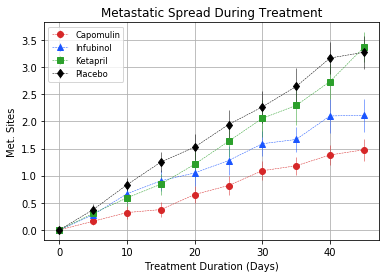

In [10]:
# Generate the Plot (with Error Bars)

#TODO: Create a loop that will go throw object of data instead of 4 ugly lines
plt.errorbar(mean_met_pivot_data.index,mean_met_pivot_data["Capomulin"], yerr=std_err_met_pivot_data["Capomulin"], c='#d62728', marker='o', ls='dashed', linewidth=.5)
plt.errorbar(mean_met_pivot_data.index,mean_met_pivot_data["Infubinol"], yerr=std_err_met_pivot_data["Infubinol"], c='#1a55FF', marker='^', ls='dashed', linewidth=.5)
plt.errorbar(mean_met_pivot_data.index,mean_met_pivot_data["Ketapril"], yerr=std_err_met_pivot_data["Ketapril"], c='#2ca02c', marker='s', ls='dashed', linewidth=.5)
plt.errorbar(mean_met_pivot_data.index,mean_met_pivot_data["Placebo"], yerr=std_err_met_pivot_data["Placebo"], c='#000000', marker='d', ls='dashed', linewidth=.5)

# Show the Figure
plt.title('Metastatic Spread During Treatment')
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig('diagrams/metastatic_response_treatment.png')


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mc_data.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
mice_count = pd.DataFrame({"Mouse Count": mice_count["Tumor Volume (mm3)"]})
# Preview DataFrame
mice_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_count = mice_count.reset_index()
mice_pivot_count = mice_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
mice_pivot_count


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


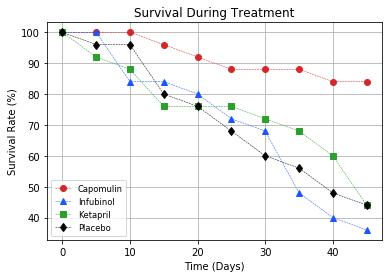

In [13]:
# Generate the Plot (Accounting for percentages)

#TODO: Create a loop that will go throw object of data instead of 4 ugly lines
plt.plot(100 * mice_pivot_count['Capomulin'] / 25, "ro", linestyle="dashed", c='#d62728', marker='o', linewidth=0.5)
plt.plot(100 * mice_pivot_count['Infubinol'] / 25, "ro", linestyle="dashed", c='#1a55FF', marker='^', linewidth=0.5)
plt.plot(100 * mice_pivot_count['Ketapril'] / 25, "ro", linestyle="dashed", c='#2ca02c', marker='s', linewidth=0.5)
plt.plot(100 * mice_pivot_count['Placebo'] / 25, "ro", linestyle="dashed", c='#000000', marker='d', linewidth=0.5)

# Show the Figure
plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig('diagrams/survival_rates.png')

plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_pivot_data.iloc[-1] - tumor_pivot_data.iloc[0]) / tumor_pivot_data.iloc[0]
tumor_pct_change_sem =  100 * (std_err_pivot_data.iloc[-1] - std_err_pivot_data.iloc[0]) / std_err_pivot_data.iloc[0]

# Display the data to confirm
tumor_pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined